In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
#import sys
import pickle
import itertools
import statsmodels.api as sm
from scipy import interpolate

In [3]:
from sabreMod import sosf,sosfn,acf,sosfh
from sabre import sosfw

In [4]:
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

In [5]:
samples=pd.read_csv('Res//listdata.txt',header=None)
#samples

In [6]:
d=840000
pc=d*(4.85*10**(-6))
pc

4.074

In [7]:
i=11
samples[0][i]

'604IHB'

In [8]:
dt=pd.read_csv('Res//'+samples[0][i]+'.csv')
#dt=pd.read_csv('datos Car.csv')
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
#os.remove(datap)
dt.describe()

,X,Y,Center,Peak,Width,RV,Sig
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,142.000000
mean,109.943649,9.312632,6556.736575,4226.021754,1.121786,-251.031276,14.935756
std,11.335949,6.285853,0.194014,4693.707000,0.462009,8.862651,11.260808
min,91.190000,0.000000,6556.306000,321.200000,-0.921000,-270.700208,0.775992
25%,100.580000,4.000000,6556.590000,1486.000000,0.947000,-257.726926,7.378551
50%,109.960000,8.000000,6556.727000,2424.000000,1.058000,-251.468687,11.503246
75%,119.350000,15.000000,6556.840000,5049.000000,1.212000,-246.306783,18.451527
max,128.740000,19.600000,6557.288000,30960.000000,3.215000,-225.841886,58.904270


(89.3125, 130.6175, -0.9800000000000001, 20.580000000000002)

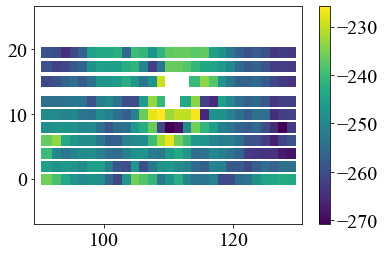

In [9]:
plt.scatter(dt.X,dt.Y,c=dt.RV, s=100,marker='s')
plt.colorbar()
plt.axis('equal')

(89.3125, 130.6175, -0.9800000000000001, 20.580000000000002)

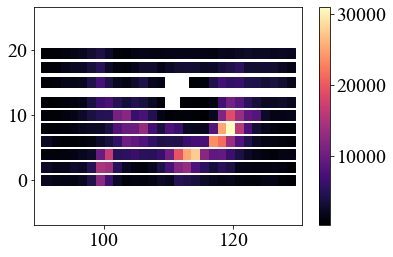

In [10]:
plt.scatter(dt.X,dt.Y,c=dt.Peak, s=100,marker='s',cmap='magma')
plt.colorbar()
plt.axis('equal')

1.3399999999999892


[None, None]

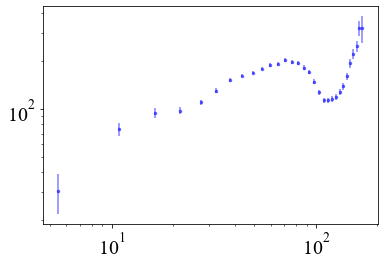

In [11]:
SF=sosf(dt)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [12]:
x=SF['Lag']
y=SF['Nmqvd']-2*(dt.RV.std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([ 40.28233991,  96.27696288, 141.20232411])

In [13]:
s=SFr[0]

In [14]:
ss=np.round(2*(dt.RV.std())**2,2)

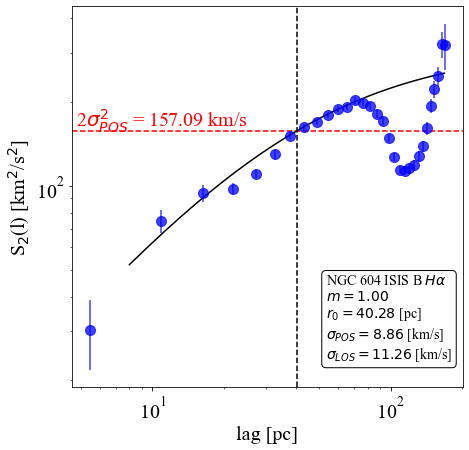

In [19]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=2*(dt.RV.std())**2, color='r', linestyle='--')
ax.text(0.23, 0.7,'2$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.0

x=np.linspace(8,int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*2*(dt.RV.std())**2

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('NGC 604 ISIS B ' r'$H\alpha$', r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (dt.RV.std()) + ' [km/s]',r'$σ_{LOS}=%.2f$'%(dt.Sig.std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

fig.savefig('Img//'+samples[0][i]+'.pdf')

In [16]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 6.794842720031738 seconds ---
